# Assignment 2

**Assignment 2: Evolutionary Algorithms**

**Goal**: Implement an Evolutionary Algorithm to solve continuous and discrete problems.

* Part1: continuous problem that is concerned with finding minimum of functions, in this case, Sphere and Ackley
  functions.

* Part 2: discrete problem that is concerned with finding the solution for the N-queens problem. Could be defined as minimization or maximization.

For both parts, this assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve given problems.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

**Setup**

**Install Prerequisites (Part 1 and 2)**

In [1]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


**Imports (Part 1 and 2)**

In [2]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums

# Set seed
np.random.seed(42)

**Jupyter Notebook Magic (Part 1 and 2)**

In [17]:
# Enables inline matplotib graphs
%matplotlib inline

# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
# %matplotlib qt5
# %pip install PyQt5
# plt.ion()

## Part 1: Continuous Optimization (5 points total)

In this part of the assignment you will implement an Evolutionary Algorithm to find the minimum of the following functions: [Sphere](https://www.sfu.ca/~ssurjano/spheref.html) and [Ackley](https://www.sfu.ca/~ssurjano/ackley.html) functions.


**Function Definitions \& Plotting**

**Sphere Function**


In [18]:
def Sphere(x):
    """source: https://www.sfu.ca/~ssurjano/spheref.html"""
    dimension = x.shape[0]
    return (1 / dimension) * (sum(x**2))

**Ackley Function**

In [19]:
def Ackley(x):
    """source: https://www.sfu.ca/~ssurjano/ackley.html"""

    # Ackley function parameters
    a = 20
    b = 0.2
    c = 2 * np.pi
    dimension = len(x)

    # Individual terms
    term1 = -a * np.exp(-b * np.sqrt(sum(x**2) / dimension))
    term2 = -np.exp(sum(np.cos(c * xi) for xi in x) / dimension)
    return term1 + term2 + a + np.exp(1)

**Plotting**

In [20]:
# Generate data for plotting
boundary_point, resolution = 5, 500
x = np.linspace(-boundary_point, boundary_point, resolution)
y = np.linspace(-boundary_point, boundary_point, resolution)

# Generate the coordinate points
X, Y = np.meshgrid(x, y)
positions = np.column_stack([X.ravel(), Y.ravel()])

# Get depths for all coordinate positions
z_unimodal = np.array(list(map(Sphere, positions))).reshape([resolution, resolution])
z_multimodal = np.array(list(map(Ackley, positions))).reshape([resolution, resolution])

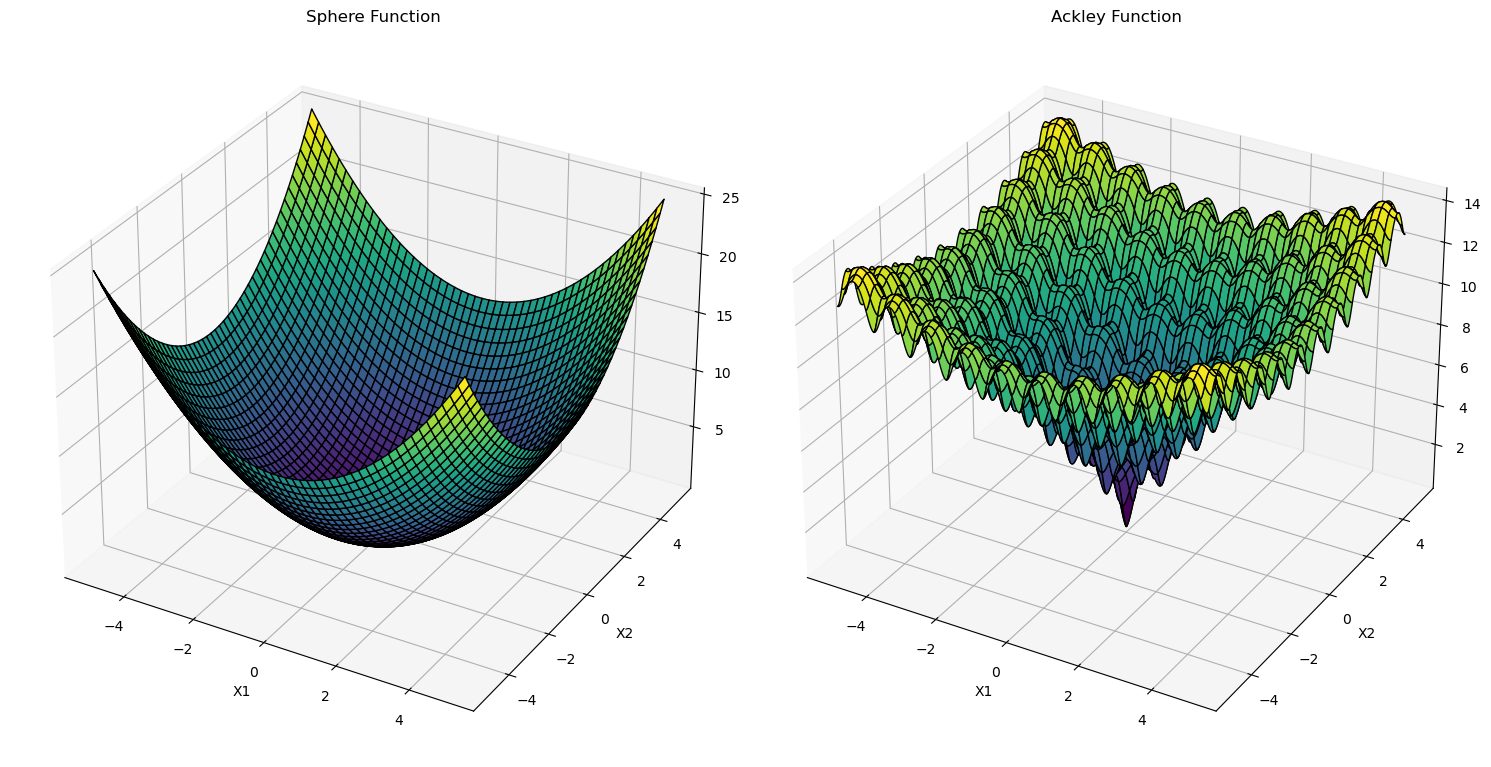

In [21]:
# Create 3D plot
fig = plt.figure(figsize=(15, 8))

titles = ["Sphere Function", "Ackley Function"]
for idx, z in enumerate([z_unimodal, z_multimodal]):
    # Create sub-plot
    ax = fig.add_subplot(121 + idx, projection="3d")

    # Plot the surface
    ax.plot_surface(X, Y, z, cmap="viridis", edgecolor="k")

    # Set labels
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(titles[idx])
    # ax.autoscale(True)

# Show the plot
plt.tight_layout()
plt.show()

---
**Question 1.1 (0-0.2 pt):** Looking at the Sphere and Ackley functions, please discuss the characteristics of these functions and compare their complexity in terms of local and global optima.

**Answer:** The two functions are continous and describe geometric shapes. While the gradient of the sphere function increases in the same direction always, it is easier for an algorith to find the global optima just by following the direction of this increase. The Ackley function, on the other hand, does not have this property, and sometimes the direction of decrease of the function is the same as increase if you keep longer on the same direction, and this can lead to the algorithm getting stuck on a local optima.

---
**Question 1.2 (0-0.25-0.5 pt):** Please provide a pseudo-code for your evolutionary algorithm. Please try to be as formal as possible!

**Answer:** PLEASE FILL IN


function evolution(int dimensions,int individuals, int generations, int selection) {

    #initializes the population, with shape dimensions X individuals (hyperparameters)
    generation = initialize_gereation(dimensions,individuals)
    fitness = 1D array of the fitness of the generation, shape 1 X individuals
     
    for i in range(generations) {
    
        #get fitness values for the generation's individuals
        fitness = evaluate(generation) 
              
        #select individuals with the best fitness, based on a probability distribution.
        #the probability of 1 individual being chosen is its fitness value over the sum of all fitness values
        
        selected_individuals = parent_selection(individuals,fitness)
        
        #make a new generation based on crossover operations of the selected individuals
        
        new_generation = crossover(selected_individuals)
        
        #mutation is applied to the new_generation
        mutated_new_generation = mutate(new_generation)
        
        #evaluate fitness of the new generation
        new_fitness = evaluate(mutated_new_generation)
        
        #select the survivors
        generation = survivor_selection(generation,fitness,mutated_new_generation,new_fitness)
        
     }

}

---
**Task 1.1: Implementation of Evolutionary Algrotihm (0-0.65-1.3-1.95-2.6 pt):** Implement an evolutionary algorithm and its components to find the minimum point of a function. Here, domain should be between [-50,50].

In [276]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.65 pts if the code works but some functions are incorrect and it is badly explained
# 1.3 pts if the code works but some functions are incorrect but it is explained well
# 1.95 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 2.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################

import random

#Initialize a population randomly based on the population size and dimensions
def initialization(population_size, num_dimensions):
    """
    Initialize the starting population with random individuals.
    Each gene of an individual corresponds to a point on a dimension in the function
    """
    
    ################################################################

    # PLEASE FILL IN
    #change this to be between -50 and 50
#     x = np.random.rand(population_size,num_dimensions)
    x = np.random.uniform(low=-50,high=50,size=(population_size,num_dimensions))

    ################################################################

    return x #return population


# Implement the evaluation function that can evaluate all the solutions in a given population.
def evaluation(x, objective_function):
    """Evaluate the fitness of the population members"""

    ################################################################
    
    # PLEASE FILL IN
    fitness = np.apply_along_axis(objective_function,axis=1,arr=x)
    
    ################################################################
    return fitness


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def crossover(x_parents,p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################

    # PLEASE FILL IN
    
#     print(f"crossover x_parents: {x_parents}")
    
    offspring = np.empty((x_parents.shape[0],x_parents.shape[1]))
    
    parents_length = x_parents.shape[0]
    dimensions = x_parents.shape[1]
    
    for i in range(0,parents_length,2):
#            print(x_parents[i][:p_crossover])
        if np.random.random() < p_crossover:
            offspring[i] = np.concatenate((x_parents[i][:dimensions//2],x_parents[i+1][dimensions//2:]))
            if i < parents_length-1:
                offspring[i+1] = np.concatenate((x_parents[i][dimensions//2:],x_parents[i+1][:dimensions//2]))
        else:
            offspring[i] = np.copy(x_parents[i])
            if i < parents_length-1:
                offspring[i+1] = np.copy(x_parents[i])
    ################################################################

#     print(f"crossover offspring {offspring}")
    return offspring


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def mutation(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # PLEASE FILL IN
    
    dimensions = x.shape[1]
    
    standard_deviation = np.nanstd(x)
    
    for individual in x:
        if np.random.random() < mutation_rate:
            mutation_index = np.random.randint(dimensions)
            individual[mutation_index] = individual[mutation_index] + standard_deviation * np.random.randn()

    ################################################################

    return x


def parent_selection(x, f):
    """Select parents for the next generation"""

    ################################################################
        
    # PLEASE FILL IN
    total_fitness = int(np.ceil(np.nansum(f)))
    if total_fitness == 0:
        return x,f
    
    
    total_fitness = int(total_fitness)
    
    x_parents = np.empty((x.shape[0],x.shape[1]))
    f_parents = np.empty((x.shape[0],1))
    
    #make a selection vector to randomly pick individuals later

    selection_vector = np.empty((total_fitness,x.shape[1]))
    fitness_selection_vector = np.empty((total_fitness,1))
    last_position = 0
    
#     print(f"total fitness {total_fitness}")
    
    for (individual,fitness) in zip(x,f):
        try:
            positions_occupied = int(np.ceil(fitness))
        except Exception as e:
            positions_occupied = 0
        
#         print(f"individual {individual}")
        selection_vector[last_position:last_position+positions_occupied] = individual
#         print(f"filled selecion_vector {selection_vector[last_position:last_position+positions_occupied-1]}")
        fitness_selection_vector[last_position:last_position+positions_occupied] = fitness
        last_position = last_position+positions_occupied
                
    for i in range(x.shape[0]):
        random_selection_index = np.random.randint(total_fitness)
#         print(f"rand select index {random_selection_index}")
        x_parents[i] = selection_vector[random_selection_index]
#         print(f"#{i} selected parent: {selection_vector[random_selection_index]}")
        f_parents[i] = fitness_selection_vector[random_selection_index]
        
    ####################################
    return x_parents, f_parents


def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""

    ################################################################

    
    # PLEASE FILL IN    
    
    top_performing_indices = []
    
    population = np.concatenate((x,x_offspring))

    population_fitness = np.concatenate((f,f_offspring))
    fitness_copy = np.copy(population_fitness)
    survivors = np.empty((x.shape[0],x.shape[1]))
    survivor_fitness = []

    #get the top performing individuals from the previous generations
    for _ in range(x.shape[0]):
        min_index = np.argmin(fitness_copy)     
        top_performing_indices.append(min_index)
        fitness_copy[min_index] = np.inf
    
    for i,index in enumerate(top_performing_indices):
        survivors[i] = population[index]
        survivor_fitness.append(population_fitness[index])
    
    x = survivors
    f = np.asarray(survivor_fitness)

    
#     print(survivors)
#     print(survivor_fitness)
    ################################################################

    return x, f


def ea(
    # hyperparameters of the algorithm
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,  # mutation rate
    dimensions,  # number of dimensions
    objective_function,  # objective function to be minimized
#     n_parents=10, #number of parents to generate the next population
#     point_of_crossover=5, #point of slicing for performing one-point-crossover
#     max_mutation_noise=5, #max mutation noise
):
    # Calculate the maximum number of generations
    # Maximum number of function evaluations should be the same independent of the population size
    max_generations = int(max_fit_evals / population_size)  # DO NOT CHANGE
    
    ################################################################
    # PLEASE FILL IN
    
    x = initialization(population_size,dimensions)
    f = evaluation(x,objective_function)

    ################################################################

    # Find the best individual and append to a list to keep track in each generation
    idx = np.argmin(f)
    x_best = [x[idx]]
    f_best = [f[idx]]

    # Loop over the generations
    for i in range(max_generations - 1):
        # Perform the EA steps
       
        ################################################################
        
        # PLEASE FILL IN
        
        #select parents for the next generation
                    
        parents,parents_fitness = parent_selection(x,f)
        
        #generate offspring from crossover of parents
        
        offspring = crossover(parents,p_crossover)
        
        #mutate offspring
        mutated_offspring = mutation(offspring,m_rate)
        
        #get the offspring fitness to be passed to survival_selection
        offspring_fitness = evaluation(mutated_offspring,objective_function)
                
        x,f = survivor_selection(x,f,offspring,offspring_fitness)
        
        ################################################################
        

        # Find the best individual in current generation and add to the list
        idx = np.argmin(f)
        xi_best = x[idx]
        fi_best = f[idx]
        
        if fi_best < f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])
        

    return x_best, f_best  # return the best solution and fitness in each generation

#### Check Your Implementation: Running The Evolutionary Algorithm

Run the cell below, if you implemented everything correctly, you should see
the algorithm running.

In [283]:
# Dummy parameters
kwargs = {
    "population_size": 20,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.1,  # mutation rate
    "dimensions": 10,
    "objective_function": Sphere,
}

# Run the EA
x_best, f_best = ea(**kwargs)

# Print the best individual and its fitness
print("Best solution:", x_best[-1])
print("Best Fitness:", f_best[-1])

# Clear cache
del x_best, f_best, kwargs

Best solution: [-0.24057943 -8.21564076 -0.1417764   0.03083981 -1.0662096  -0.24057943
 -8.21564076 -0.1417764  -2.65789901  0.12346585]
Best Fitness: 14.336688918199059


**Reults and statistical analysis**

Remember that the EAs are sthocastic algorithms that can produce different results as a result of independent runs. 

How do we find overal performance of the algorithm and compare the results?

By running multiple times and performing statitical tests. Therefore, you would need to run your algorithm **20 times** and plot the *average* results.

First, we would need to **defining some helper functions** for finding the average and standard deviations of multiple runs and ploting them. In the next few cells, we give you some pre-made functions for this purpose. 

There is no work for you to do, but do look over them and get familiar with how they operate.

In [284]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [285]:
def run_experiment(population_size, p_crossover, m_rate):
    runs = 20  # DO NOT CHANGE - number of runs
    max_fit_evals = 5000  # DO NOT CHANGE

    sphere10D = []
    sphere50D = []
    ackley10D = []
    ackley15D = []

    for _ in range(runs):
        _, f_best_sphere10D = ea(
            population_size[0],
            max_fit_evals,
            p_crossover[0],
            m_rate[0],
            10,
            Sphere,
        )
        _, f_best_sphere50D = ea(
            population_size[1],
            max_fit_evals,
            p_crossover[1],
            m_rate[1],
            50,
            Sphere,
        )
        _, f_best_ackley10D = ea(
            population_size[2],
            max_fit_evals,
            p_crossover[2],
            m_rate[2],
            10,
            Ackley,
        )
        _, f_best_ackley15D = ea(
            population_size[3],
            max_fit_evals,
            p_crossover[3],
            m_rate[3],
            15,
            Ackley,
        )

        sphere10D.append(f_best_sphere10D)
        sphere50D.append(f_best_sphere50D)
        ackley10D.append(f_best_ackley10D)
        ackley15D.append(f_best_ackley15D)

    # find average and std of the runs
    sphere10D_avg, sphere10D_std = calculate_mean_std(sphere10D)
    sphere50D_avg, sphere50D_std = calculate_mean_std(sphere50D)
    ackley10D_avg, ackley10D_std = calculate_mean_std(ackley10D)
    ackley15D_avg, ackley15D_std = calculate_mean_std(ackley15D)

    avgs = [sphere10D_avg, sphere50D_avg, ackley10D_avg, ackley15D_avg]
    stds = [sphere10D_std, sphere50D_std, ackley10D_std, ackley15D_std]
    all_runs = [
        sphere10D,
        sphere50D,
        ackley10D,
        ackley15D,
    ]

    return avgs, stds, all_runs

In [286]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

#### Running The Experiments

In the following cell we run the EA over several different hyper-parameter values.

In [343]:
population_size = [50, 50, 50, 50]  # DO NOT CHANGE
p_crossover = [0.8, 0.8, 0.8, 0.8]  # DO NOT CHANGE
m_rate = [0.1, 0.1, 0.1, 0.1]  # DO NOT CHANGE

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment(
    population_size, p_crossover, m_rate
)

#### Plotting The Results

In the following cell we plot the results of the experiments.

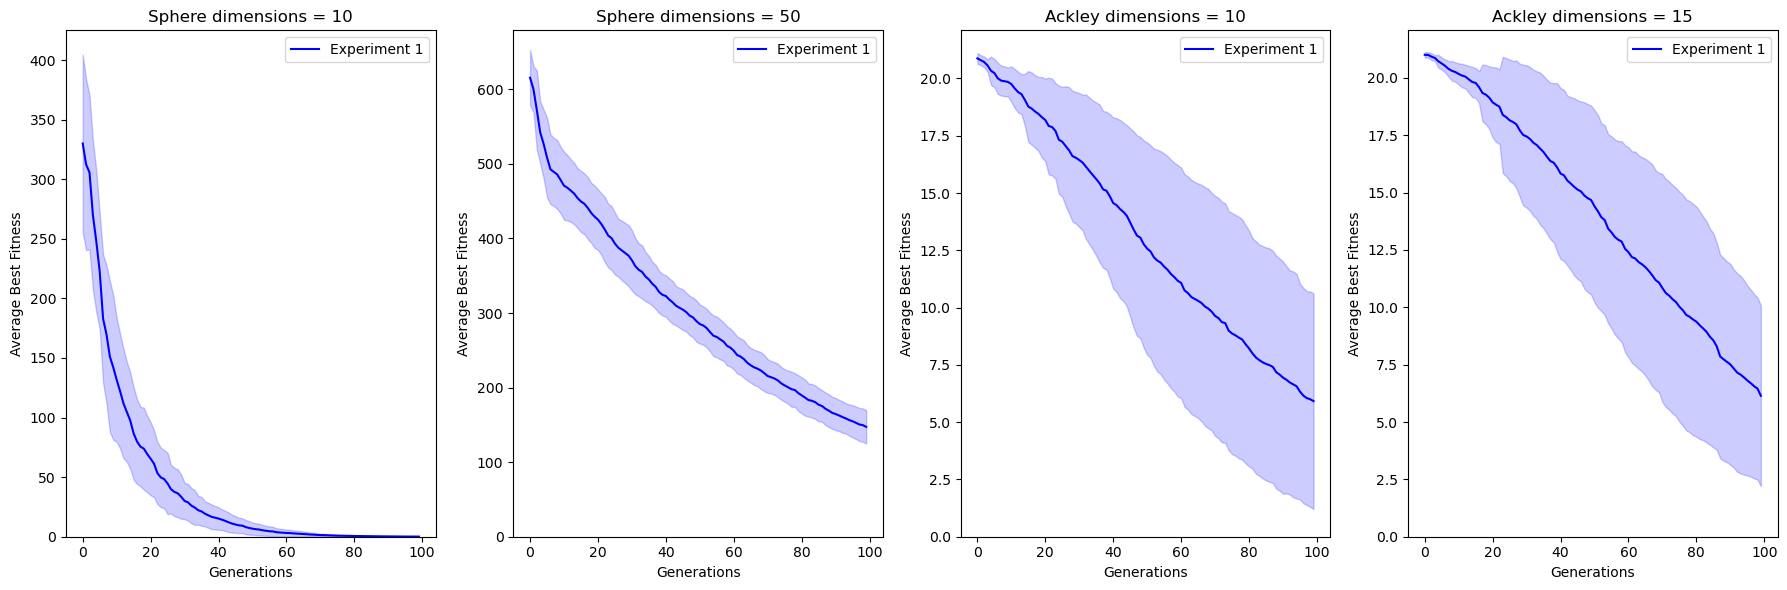

In [344]:
labels = [  # DO NOT CHANGE
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=4,
    n_queens=None,
)

---

**Question 1.3 (0-0.25-0.5 pt):** Describe the results that you see in the line graphs. How is the performance of the EA on Sphere and Ackley functions? How the results are different between functions and dimensions? What causes these differences?

**Answer:** EA results differ from Sphere and Ackley functions in the way that

---
**Improve Your Results**

Experiment with the hyperparameters of the algorithm and find a set of parameters that can perform better than the previous results. Compare the results using statistical test and find a settings where there is a statistically significant improvement.

You can adjust the *population size*, *crossover probability* and *mutation rate* to find the settings that can work statistically better relative to the previous results. Please look at the "ADJUST THESE VALUES" part to experiment and improve your solutions.

Optionally, you can also improve your algorithm by implementing/changing strategies used 

In [345]:
# Grading (bonus points):
# 0.4 pts bonus for the optional improvement: if you implement different strategy, it works and produces significantly better results
# Different strategy could be a different implementation of the mutation/crossover/parent or survival selection mechanisms


# Implement your strategy here and integrate with the Evolutionary Algorithm
# PLEASE FILL IN

##################

In [389]:
################################################################

population_size = [  # ADJUST THESE VALUES
    50,
    30,
    50,
    30,
]
p_crossover = [  # ADJUST THESE VALUES
    0.4,
    0.7,
    0.5,
    0.7,
]
m_rate = [  # ADJUST THESE VALUES
    0.3,
    0.7,
    0.6,
    0.7,
]


# raise NotImplementedError
# Remove the line above once you've made the changes you want

################################################################

**Running the experiment again**

In [390]:
avgs_experiment_2, stds_experiment_2, all_runs_experiment_2 = run_experiment(
    population_size, p_crossover, m_rate
)

**Plotting the new and previous results**

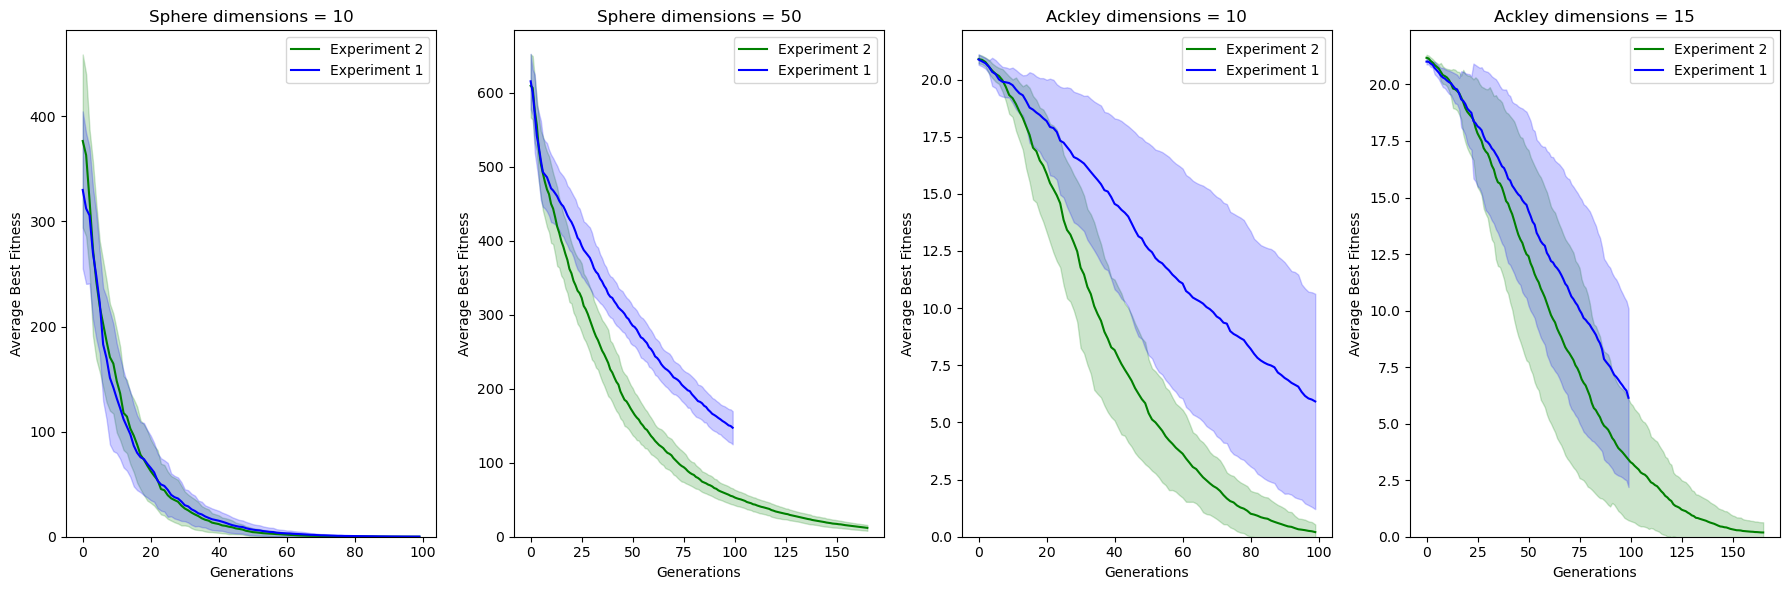

In [391]:
labels = [
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]  # DO NOT CHANGE

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=avgs_experiment_2,
    stds_experiment_2=stds_experiment_2,
    n_columns=4,
    n_queens=None,
)

**Measuring the statistical significance of differences of two sets of experiment results**

The final step is to calculate whether the results from your set of hyperparameters (experiment 2) resulted in significantly better results.

To do this, we will perform a statistical test know as [rank-sum test](https://www.wikiwand.com/en/Mann%E2%80%93Whitney_U_test).

You will calculate the rank-sum for the results of the first and second experiments.

In [392]:
alpha = 0.05

# this loops over the 4 different functions we have
#   (Sphere dimensions = 10, Sphere dimensions =50, Ackley dimensions = 10, Ackley dimensions = 15)
labels = [
    "Sphere function 10 dimensions:",
    "Sphere function 50 dimensions:",
    "Ackley function 10 dimensions:",
    "Ackley function 15 dimensions:",
]
for i in range(4):
    runs_exp_1 = all_runs_experiment_1[i]
    runs_exp_2 = all_runs_experiment_2[i]

    best_per_run_exp_1 = [sublist[-1] for sublist in runs_exp_1]
    best_per_run_exp_2 = [sublist[-1] for sublist in runs_exp_2]

    t_statistic, p_value = ranksums(best_per_run_exp_1, best_per_run_exp_2)
    if p_value < alpha:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ",significant difference.",
        )
        # else:
        #    print(labels[i], "significant difference. Experiment 2 is better.")
    else:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ",no significant difference.",
        )
        # else:
        #    print(labels[i], "no significant difference. Experiment 2 is better.")

Sphere function 10 dimensions: Experiment 1 average: 0.10874905785765081 , Experiment 2 average: 0.03438497982509042 ,significant difference.
Sphere function 50 dimensions: Experiment 1 average: 147.31354068606763 , Experiment 2 average: 11.960511712545019 ,significant difference.
Ackley function 10 dimensions: Experiment 1 average: 5.91756681210081 , Experiment 2 average: 0.20218285134552572 ,significant difference.
Ackley function 15 dimensions: Experiment 1 average: 6.142054235502721 , Experiment 2 average: 0.18801593975725367 ,significant difference.


---
**Question 1.4 (0-0.3-0.6-0.9-1.2 pt):** Please improve the results significantly in each case (i.e. on Sphere and Ackley functions with 10, 50 and 10, 15 dimensions respectively) and discuss what kinds of changes you had to do to achieve this improvement. Please provide your reasoning why the new parameter settings worked better.

Grading:

0 pts: No answer or non of the cases were improved.

0.3 pts: At least one of the cases improved significantly but reasons why were not clearly explained.

0.6 pts: One or two cases improved significantly and the reasons why were somewhat clear.

0.9 pts: Three to four cases improved significanlty and the reasons why are clear.

1.2 pts: All of the cases improved significanlty and the reasons why are clear.


**Answer:** 

The changes I made were increasing probability of crossover and probability of mutation for all functions. For Sphere 50 dimensions and Ackley 15 dimensions, I decreased the population so there were more generations and therefore gave more time for the algorithm to achieve an optimum solution. For all functions, increasing mutation rate and probability of crossover resulted in more exploration, discovering new solutions which resulted in more optimal results. This was significantly impactful for the Ackley Function, because it is more beneficiary of exploration as it has multiple local minimas.

---
## Part 2: Discrete Optimization (The N-Queens Problem, 5 points total) 

Implement an Evolutionary Algorithm for the **n-queens problem**.
Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

We would like to implement an EA that can find a solution for any given N by N board but in this case it is required to place N queens where none of them attack each other.

You may use the implementation of the EA you used for solving continuous problems in Part 1. But remember, this is a discere problem so you would need to think about how to represent the solutions and search using the evolutionary operators.

Consider, what changes you would need to do! 


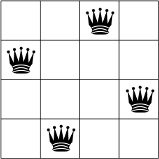


It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

**Question 2.1 (0-0.3 pt):** How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** We can represent a solution as a vector with shape 1 X 4. As each row and column can only have one Queen (so that they do not attack each other), each position represents the row index, and the value in that position corresponds to the column the Queen is positioned in. 

**Question 2.2 (0-0.2 pt)**: Please write down an example representation and discuss what it means.

**Answer:** Representation: [2,0,3,1]
                             
            This is a representation of the example solution of the 4x4 N-Queens problem, given above. The shape is 1 X 4, each position of the vector contains a value representing the column a queen is positioned in. For example, in this representation, index 0 contains 2, which means there is a Queen at row 0 column 2, index 1 contains 0, which means there is a Queen at row 1 column 0, and so on.

**Question 2.3 (0-0.2 pt):** How many possible solutions can be generated in your representation?

**Answer:** My representation can generate 24 solutions. Because of the constraints of the N-Queens probem, each row and column can only have one Queen. In the first row, there are 4 possible values (0,1,2,3), in the second 3, third 2 and finally, the last row only has 1 possible value. That makes 4 * 3 * 2 * 1, which is equal to 24.

---
**Task 2.1 (0-0.20-0.40-0.80):** Implementation of solution encoding, visualization and evaluation functions.

In [166]:
################################################################


example_solution = np.asarray([2,0,3,1])

################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells.


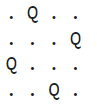

In [167]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""

    ################################################################
    print("Visualized solution:")
    
    
    for row in range(len(solution)):
        board_row = ""
        for col in range(len(solution)):
            if col == solution[row]:
                board_row += "Q "
            else:
                board_row += ". "
        print(board_row)
        
    ################################################################
visualize_solution(example_solution)

Visualized solution:
. . Q . 
Q . . . 
. . . Q 
. Q . . 


Write the evaluation function to assess how good your solution is.

In [317]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of an solution."""
    ################################################################
        
    colisions = 0
    
    # PLEASE FILL IN
    dimensions = solution.shape[0]
    [2,0,3,1]
    for i in range(dimensions):
        for j in range(i+1, dimensions):
            if solution[i] == solution[j] or abs(i - j) == abs(solution[i] - solution[j]):
                colisions += 1
    if colisions > dimensions:
        return 0
    ################################################################
    
    return abs(dimensions-colisions)

Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [318]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [2 0 3 1]
Phenotype (solution visualization):
Visualized solution:
. . Q . 
Q . . . 
. . . Q 
. Q . . 
Solution fitness 4


---

**Task 2.2 (0-0.4-0.8-1.2-1.6 pt):** Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [319]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


#initialize a population of solutions for the N queens problem where num_dims = N 
def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################

    # PLEASE FILL IN
    #generates a random array with shape 1 x num_of_dims.
    #low = 0 because there are no negative columns
    #high = num_of_dims, because there are no columns higher than the num_of_dims-1
    x = np.random.randint(low=0,high=num_of_dims,size=(population_size,num_of_dims))
    ################################################################

    return x #return population


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################

    # PLEASE FILL IN
    # create a new empty array of the same shape as parents
    offspring = np.empty((x_parents.shape[0],x_parents.shape[1]))
        
    dimensions = x_parents.shape[0]
    
    for i in range(0,dimensions,2):
    #           print(x_parents[i][:p_crossover])
        if np.random.random() < p_crossover:
            offspring[i] = np.concatenate((x_parents[i][:dimensions//2],x_parents[i+1][dimensions//2:]))
            if i < dimensions-1:
                offspring[i+1] = np.concatenate((x_parents[i][dimensions//2:],x_parents[i+1][:dimensions//2]))
        else:
            offspring[i] = np.copy(x_parents[i])
            if i < dimensions-1:
                offspring[i+1] = np.copy(x_parents[i])
    ################################################################

    return offspring


def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # PLEASE FILL IN
    dimensions = x.shape[1]

    for individual in x:
        #to simulate probability of mutation
        if np.random.random() < mutation_rate:
            #randomly pick an index, and a 
            mutation_index = np.random.randint(low=0,high=dimensions)
            random_pos = np.random.randint(low=0,high=dimensions)
            #to make sure the mutation is successful, never assign the same position as before
            while individual[mutation_index] == random_pos:
                random_pos = np.random.randint(low=0,high=dimensions)
#             print("mutation: ", mutation_index,random_pos)
            individual[mutation_index] = random_pos
    ################################################################

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation"""

    ################################################################
        
    x_parents = np.empty((x.shape[0],x.shape[1]))
    f_parents = np.empty((x.shape[0],1))
    total_fitness = int(np.ceil(np.nansum(f)))
    selection_vector = np.empty((total_fitness,x.shape[1]))
    fitness_selection_vector = np.empty((total_fitness,1))
    last_position = 0
    
#     print(f"total fitness {total_fitness}")
    
    for (individual,fitness) in zip(x,f):
        try:
            positions_occupied = int(np.ceil(fitness))
        except Exception as e:
            positions_occupied = 0
#         print("idividual, positions_occupied", individual, positions_occupied)
        selection_vector[last_position:last_position+positions_occupied] = individual
#         print("filled selection_vector", selection_vector[last_position:last_position+positions_occupied])
        fitness_selection_vector[last_position:last_position+positions_occupied] = fitness
        last_position = last_position+positions_occupied
#         print(last_position)
    
    
    for i in range(x.shape[0]):
        random_selection_index = np.random.randint(low=0,high=total_fitness)
#         print(f"rand select index {random_selection_index}")
        x_parents[i] = selection_vector[random_selection_index]
#         print(f"#{i} selected parent: {selection_vector[random_selection_index]}")
        f_parents[i] = fitness_selection_vector[random_selection_index]
#         print(f"#{i} selected fitness: {fitness_selection_vector[random_selection_index]}")

    ####################################
    return x_parents, f_parents


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""


    ################################################################

    top_performing_indices = []
    
    population = np.concatenate((x,x_offspring))

    population_fitness = np.concatenate((f,f_offspring))
    fitness_copy = np.copy(population_fitness)
    survivors = np.empty((x.shape[0],x.shape[1]))
    survivor_fitness = []

    #get the top performing individuals from the previous generations
    for _ in range(x.shape[0]):
        max_index = np.argmax(fitness_copy)     
        top_performing_indices.append(max_index)
        fitness_copy[max_index] = 0
    
    for i,index in enumerate(top_performing_indices):
        survivors[i] = population[index]
        survivor_fitness.append(population_fitness[index])
    
    x = survivors
    f = np.asarray(survivor_fitness)

    ################################################################

    return x, f


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    #########################
    #  PLEASE FILL IN
    
    x = initialization_n_queens(population_size,num_of_dims)
    f = evaluation_n_queens(x)
    
#     print(x)
    
    #########################

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for k in range(max_generations - 1):
        # Select population size parents
        
        #########################
         #PLEASE FILL IN
        
        #select parents for the next generation
                    
        parents,parents_fitness = parent_selection_n_queens(x,f)

        #generate offspring from crossover of parents
#         print(parents)
        
        offspring = crossover_n_queens(parents,p_crossover)

        #mutate offspring
        mutated_offspring = mutation_n_queens(offspring,m_rate)
                
        #get the offspring fitness to be passed to survival_selection
        offspring_fitness = evaluation_n_queens(mutated_offspring)
        
        x,f = survivor_selection_n_queens(x,f,offspring,offspring_fitness)
        
        
#         if k < 5:
#             print("PARENTS")
#             print(parents)
#             print("OFFSPRING")
#             print(offspring)
#             print("MUTATED OFFSPRING")
#             print(mutated_offspring)
        #########################

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

        # Append the best individual to the list
        f_best.append(fi_best)
        x_best.append(xi_best)
        
    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.


In [325]:
print("Case when N=8:")

x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
print(x_best[-1])
visualize_solution(x_best[-1])

Case when N=8:
Best fitness: 8
Best solution found:
[3. 1. 6. 2. 5. 7. 0. 4.]
Visualized solution:
. . . Q . . . . 
. Q . . . . . . 
. . . . . . Q . 
. . Q . . . . . 
. . . . . Q . . 
. . . . . . . Q 
Q . . . . . . . 
. . . . Q . . . 


In [331]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(250, 200000, 0.5, 0.3, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
Best fitness: 16
Best solution found:
Visualized solution:
. . . . . . . Q . . . . . . . . 
. . . . . . . . . . . . Q . . . 
. . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . Q . . 
. . . . . Q . . . . . . . . . . 
. . . . . . . . . . . . . . Q . 
. . . . . . Q . . . . . . . . . 
. . . . . . . . . . Q . . . . . 
. . . Q . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . 
. . . . . . . . Q . . . . . . . 
. . . . . . . . . . . . . . . Q 
. . . . . . . . . . . Q . . . . 
. . Q . . . . . . . . . . . . . 
Q . . . . . . . . . . . . . . . 
. . . . . . . . . Q . . . . . . 


In [396]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(20, 20000, 0.4, 0.5, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=32:
Best fitness: 31
Best solution found:
Visualized solution:
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . 
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . 
. . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . 
. . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . 
. . . . . Q . .

---

**Question 2.4 (0-0.2-0.4-0.6-1-1.5 pt):** Describe the results. What was the fitness found for each case? Were you able to find fitness scores of 8, 16 and 32 for N=8, 16 and 32 cases? How did you find them? Did you try improving the results by testing different parameters and/or evolutionary operators?

Grading:

0 pts: no solution or visualization provided.

0.2 pts: Solutions and visualizations were provided, no insights provided how the results achieved. 

0.4 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, limited/no insights provided on how this result is achieved. 

0.6 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, insights on how this result is achieved provided.

1 pts: Solutions and visualizations were provided, for N=8 and N=16, optimum solutions were found, insights on how this result is achieved provided. 

1.5 pts: Solutions and visualizations were provided, for N=8, N=16 and N=32, optimum solutions were found, insights on how this result is achieved provided. 

**Answer:** The results found for each case were the following

            - N=8: Optimum solution was found, fitness=8
                The achievement of this result did not involve any changes on the hyperparameters, so I just ran the algorithm with the provided values and got the result
                
            - N=16: Optimum solution was found, fitness=16
                To achieve this solution, I have increased population size to 250 indivuduals, to increase the chances of getting better individuals, and doubled max_fit_evals, so the algorithm has more generations and compensates for the increase in individuals, therefore more time to optimize and achieve an optimal result. I also increased the probability of mutation, in order to achieve more exploration.
                
            - N=32: Optimum solution was not found, fitness=31
                To achieve this solution, I have decreased the population size to 20 individuals and doubled max_fit_evals, so the algorithm has more generations, therefore more time to optimize and achieve an optimal result. I also significantly increased (5x) the probability of mutation, in order to achieve much more exploration. The problem here was that that while these changes helped increase the fitness from 24 to 29, no significant changes in the fitness were observed after a certain point of increase, while the time to run the algorithm was increasing significantly.

---

#### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm similar to Part 1. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [333]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):
    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.

    max_fit_evals = 10000

    fitness_8 = []
    fitness_16 = []
    fitness_32 = []

    runs = 10

    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [334]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


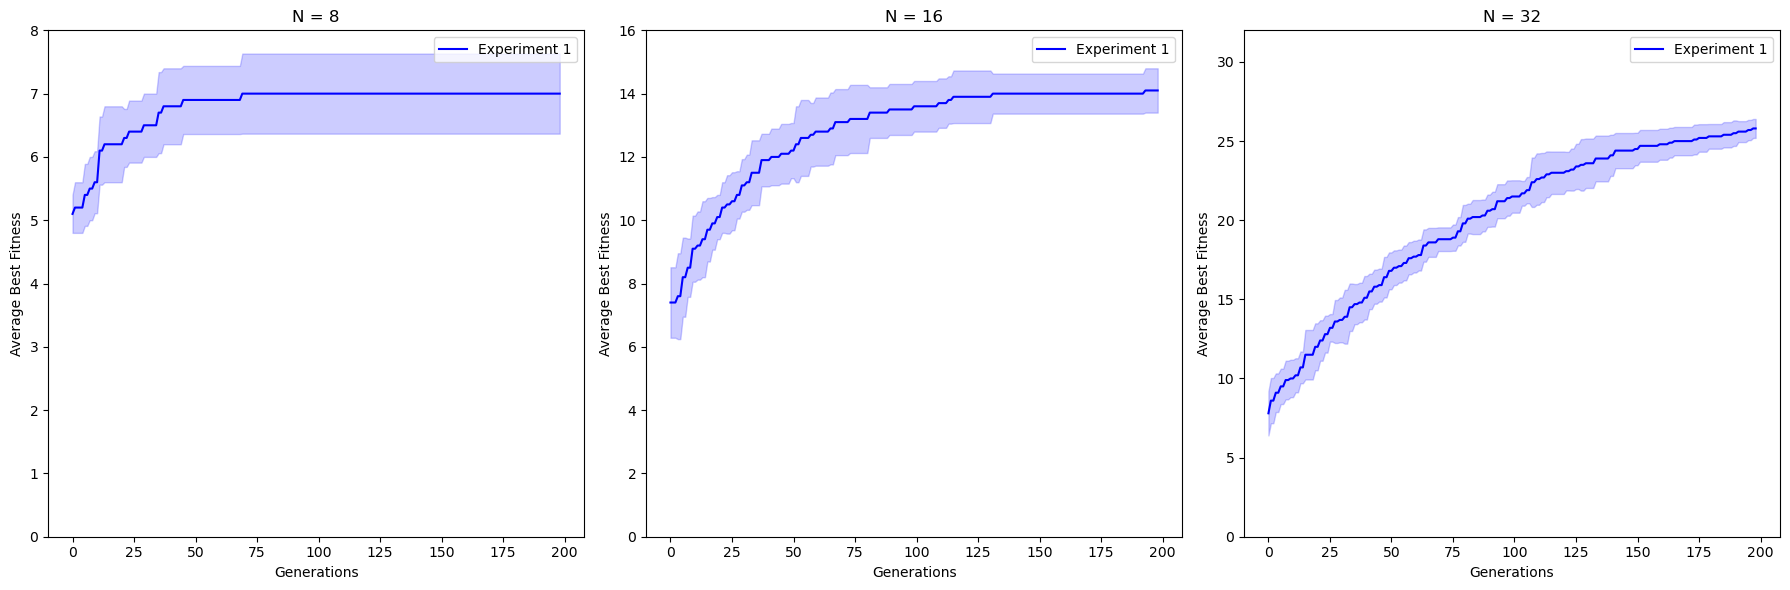

In [335]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

**Question 2.5 (0-0.2-0.4 pt)** Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: The maximum average fitness for each case was:
            
            - N=8: 7
            - N=16: 14
            - N=32: 25
            
            The differences between problem cases is that the less dimensions the problem has, the closer to the optimum solution the average fitness gets. That is because, of course, the complexity of the problem increases with the number of dimensions. To keep good performance while increasing dimensions, an ideal correction would be to increase the population members and evaluation intervals as the number of dimensions grow. It could also be satisfactory to increase exploration by raising probabilities of crossover and mutation, so that you could compensate without having as many individuals.
            

